In [1]:
import sklearn
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
X_ = pd.read_csv('../Data/X_final.csv')
Y = pd.read_csv('../Data/Y_final.csv')

In [ ]:
#one hot encode
dumdum = pd.get_dummies(X_['No_QR'], prefix = 'category')
X_ = pd.concat([X_, dumdum], axis=1)

In [10]:
#normalize position
#X_['CENTROID X'] = (X_['CENTROID X']-X_['CENTROID X'].mean())/X_['CENTROID X'].std()
#X_['CENTROID Y'] = (X_['CENTROID Y']-X_['CENTROID Y'].mean())/X_['CENTROID Y'].std()

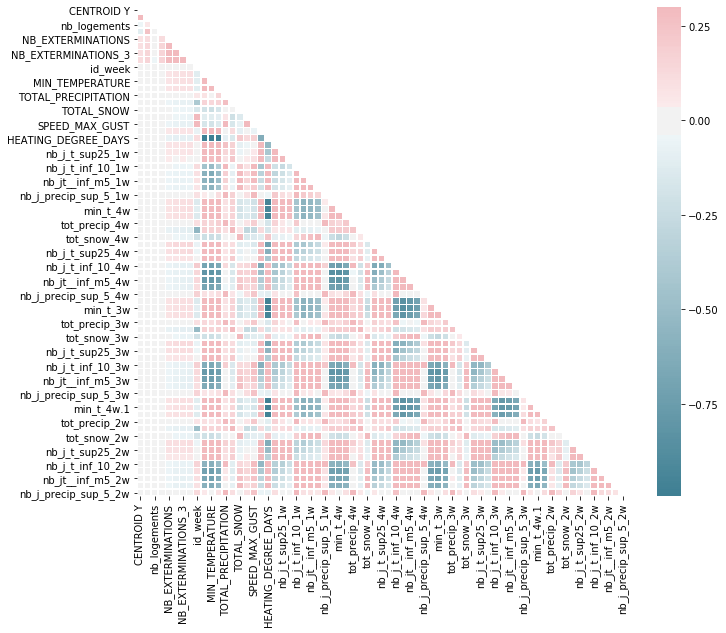

In [15]:
corr = X_.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5)

In [11]:
X_.columns

Index(['CENTROID Y', 'CENTROID X', 'nb_logements', 'prop_log_sociaux',
       'NB_EXTERMINATIONS', 'NB_EXTERMINATIONS_2', 'NB_EXTERMINATIONS_3',
       'NB_EXTERMINATIONS_4', 'id_week', 'MEAN_TEMPERATURE', 'MIN_TEMPERATURE',
       'MAX_TEMPERATURE', 'TOTAL_PRECIPITATION', 'TOTAL_RAIN', 'TOTAL_SNOW',
       'DIRECTION_MAX_GUST', 'SPEED_MAX_GUST', 'COOLING_DEGREE_DAYS',
       'HEATING_DEGREE_DAYS', 'nb_j_t_sup20_1w', 'nb_j_t_sup25_1w',
       'nb_j_t_sup30_1w', 'nb_j_t_inf_10_1w', 'nb_j_t_inf_0_1w',
       'nb_jt__inf_m5_1w', 'nb_j_t_inf_m10_1w', 'nb_j_precip_sup_5_1w',
       'mean_t_4w', 'min_t_4w', 'max_t_4w', 'tot_precip_4w', 'tot_rain_4w',
       'tot_snow_4w', 'nb_j_t_sup20_4w', 'nb_j_t_sup25_4w', 'nb_j_t_sup30_4w',
       'nb_j_t_inf_10_4w', 'nb_j_t_inf_0_4w', 'nb_jt__inf_m5_4w',
       'nb_j_t_inf_m10_4w', 'nb_j_precip_sup_5_4w', 'mean_t_3w', 'min_t_3w',
       'max_t_3w', 'tot_precip_3w', 'tot_rain_3w', 'tot_snow_3w',
       'nb_j_t_sup20_3w', 'nb_j_t_sup25_3w', 'nb_j_t_sup30_

In [61]:
feats = ['mean_t_4w', 'min_t_4w', 'max_t_4w', 'tot_precip_4w', 'tot_rain_4w',
       'tot_snow_4w', 'nb_j_t_sup20_4w', 'nb_j_t_sup25_4w', 'nb_j_t_sup30_4w',
       'nb_j_t_inf_10_4w', 'nb_j_t_inf_0_4w', 'nb_jt__inf_m5_4w',
       'nb_j_t_inf_m10_4w', 'nb_j_precip_sup_5_4w',
       'min_t_4w.1']
for feat in feats:
    prefix = feat[:-2]
    for i in range(2, 4):
        diff_feat = 'diff_'+ prefix + str(i+1) + str(i) + 'w'
        if (prefix + str(i+1)+'w') in X_.columns and (prefix + str(i)+'w') in X_.columns:
            X_[diff_feat] =  X_[prefix + str(i+1)+'w'] -  X_[prefix + str(i)+'w']

In [64]:
X_.columns

Index(['CENTROID Y', 'CENTROID X', 'nb_logements', 'prop_log_sociaux',
       'NB_EXTERMINATIONS', 'NB_EXTERMINATIONS_2', 'NB_EXTERMINATIONS_3',
       'NB_EXTERMINATIONS_4', 'id_week', 'MEAN_TEMPERATURE', 'MIN_TEMPERATURE',
       'MAX_TEMPERATURE', 'TOTAL_PRECIPITATION', 'TOTAL_RAIN', 'TOTAL_SNOW',
       'DIRECTION_MAX_GUST', 'SPEED_MAX_GUST', 'COOLING_DEGREE_DAYS',
       'HEATING_DEGREE_DAYS', 'nb_j_t_sup20_1w', 'nb_j_t_sup25_1w',
       'nb_j_t_sup30_1w', 'nb_j_t_inf_10_1w', 'nb_j_t_inf_0_1w',
       'nb_jt__inf_m5_1w', 'nb_j_t_inf_m10_1w', 'nb_j_precip_sup_5_1w',
       'mean_t_4w', 'min_t_4w', 'max_t_4w', 'tot_precip_4w', 'tot_rain_4w',
       'tot_snow_4w', 'nb_j_t_sup20_4w', 'nb_j_t_sup25_4w', 'nb_j_t_sup30_4w',
       'nb_j_t_inf_10_4w', 'nb_j_t_inf_0_4w', 'nb_jt__inf_m5_4w',
       'nb_j_t_inf_m10_4w', 'nb_j_precip_sup_5_4w', 'mean_t_3w', 'min_t_3w',
       'max_t_3w', 'tot_precip_3w', 'tot_rain_3w', 'tot_snow_3w',
       'nb_j_t_sup20_3w', 'nb_j_t_sup25_3w', 'nb_j_t_sup30_

In [110]:
Y['LABEL_unnorm1mois'] = Y['LABEL_1mois']*X_['nb_logements']
Y['LABEL_unnorm3mois'] = Y['LABEL_3mois']*X_['nb_logements']

In [153]:
#select subset of features to keep
to_keep = ['CENTROID Y', 'CENTROID X', 'nb_logements', 'prop_log_sociaux',
        'MEAN_TEMPERATURE', 'MIN_TEMPERATURE',#'NB_EXTERMINATIONS_4',
       'MAX_TEMPERATURE', 'TOTAL_PRECIPITATION', 'TOTAL_RAIN', 'TOTAL_SNOW',
       'DIRECTION_MAX_GUST', 'SPEED_MAX_GUST', 'COOLING_DEGREE_DAYS',
      # 'HEATING_DEGREE_DAYS',
       'mean_t_4w', 'min_t_4w', 'max_t_4w', 'tot_precip_4w', 'tot_rain_4w',
       'tot_snow_4w', 'nb_j_t_sup20_4w', 'nb_j_t_sup25_4w', 'nb_j_t_sup30_4w',
       'nb_j_t_inf_10_4w', 'nb_j_t_inf_0_4w', 'nb_jt__inf_m5_4w',
       'nb_j_t_inf_m10_4w', 'nb_j_precip_sup_5_4w',
       'min_t_4w.1']

to_keep_w_exterm = ['CENTROID Y', 'CENTROID X', 'nb_logements', 'prop_log_sociaux',
        'MEAN_TEMPERATURE', 'MIN_TEMPERATURE','NB_EXTERMINATIONS', 'NB_EXTERMINATIONS_2', 'NB_EXTERMINATIONS_3',
       'NB_EXTERMINATIONS_4',
       'MAX_TEMPERATURE', 'TOTAL_PRECIPITATION', 'TOTAL_RAIN', 'TOTAL_SNOW',
       'DIRECTION_MAX_GUST', 'SPEED_MAX_GUST', 'COOLING_DEGREE_DAYS',
      # 'HEATING_DEGREE_DAYS',
       'mean_t_4w', 'min_t_4w', 'max_t_4w', 'tot_precip_4w', 'tot_rain_4w',
       'tot_snow_4w', 'nb_j_t_sup20_4w', 'nb_j_t_sup25_4w', 'nb_j_t_sup30_4w',
       'nb_j_t_inf_10_4w', 'nb_j_t_inf_0_4w', 'nb_jt__inf_m5_4w',
       'nb_j_t_inf_m10_4w', 'nb_j_precip_sup_5_4w',
       'min_t_4w.1']


In [154]:
X = X_[to_keep]
X_w = X_[to_keep_w_exterm]

In [111]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42)

In [155]:
X_train_w, X_test_w, y_train_w, y_test_w= train_test_split( X_w, Y, test_size=0.2, random_state=42)

In [151]:
X_train_all, X_test_all, y_train_all, y_test_all= train_test_split( X_, Y, test_size=0.2, random_state=42)

# Baseline 

In [117]:
X_base =X_[['CENTROID Y', 'CENTROID X', 
       'NB_EXTERMINATIONS', 'NB_EXTERMINATIONS_2', 'NB_EXTERMINATIONS_3',
       'NB_EXTERMINATIONS_4']]
X_trainbase, X_testbase, y_trainbase, y_testbase = train_test_split( X_base, Y, test_size=0.2, random_state=42)

In [118]:

reg = LinearRegression()
reg.fit(X_trainbase, y_trainbase) 
pred = reg.predict(X_testbase)

r2_score(y_testbase, pred, multioutput= 'raw_values')

array([0.59626329, 0.51782196, 0.4839472 , 0.41787284])

In [119]:
reg = RandomForestRegressor()
reg.fit(X_trainbase, y_trainbase) 
pred = reg.predict(X_testbase)

r2_score(y_testbase, pred, multioutput= 'raw_values')

C:\Users\Mélisande\Anaconda3\envs\VRDI\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.55744866, 0.53360197, 0.58824783, 0.56404211])

# Try different models

In [120]:

reg = LinearRegression()
reg.fit(X_train, y_train) 
pred = reg.predict(X_test)

r2_score(y_test, pred, multioutput= 'raw_values')

array([0.10102468, 0.12130399, 0.16642379, 0.2031299 ])

# Random forest

In [123]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train) 

pred = rf_reg.predict(X_test)
r2_score(y_test, pred, multioutput= 'raw_values')

C:\Users\Mélisande\Anaconda3\envs\VRDI\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.52388718, 0.65379006, 0.57477136, 0.6970561 ])

In [131]:
#get feature importances
list_feats = X.columns.tolist()
feats_imp = rf_reg.feature_importances_

dict_imp = {}

for (i, elem) in enumerate(list_feats):
    dict_imp[elem] = feats_imp[i]

sorted_imp = sorted(dict_imp.items(), key=lambda kv: kv[1], reverse = True)
sorted_imp[:10]

[('prop_log_sociaux', 0.19301635069904308),
 ('nb_logements', 0.15053964492405073),
 ('CENTROID Y', 0.14193503215169126),
 ('CENTROID X', 0.06067887689440062),
 ('nb_j_t_sup20_4w', 0.05622317651637741),
 ('SPEED_MAX_GUST', 0.04715440722703125),
 ('nb_j_precip_sup_5_4w', 0.030226175126375987),
 ('nb_j_t_inf_10_4w', 0.027779712833242914),
 ('tot_precip_4w', 0.027436220872120172),
 ('tot_rain_4w', 0.026872386805067382)]

In [156]:
#try with added features of past bedbugs events
rf_reg_w = RandomForestRegressor()
rf_reg_w.fit(X_train_w, y_train_w) 

pred_w = rf_reg_w.predict(X_test_w)
r2_score(y_test_w, pred_w, multioutput= 'raw_values')

C:\Users\Mélisande\Anaconda3\envs\VRDI\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.64070327, 0.66206287, 0.67342577, 0.71196442])

In [162]:
#get feature importances
list_feats = X_train_w.columns.tolist()
feats_imp = rf_reg_w.feature_importances_

dict_imp = {}

for (i, elem) in enumerate(list_feats):
    dict_imp[elem] = feats_imp[i]

sorted_imp = sorted(dict_imp.items(), key=lambda kv: kv[1], reverse = True)
sorted_imp[:10]

[('NB_EXTERMINATIONS_4', 0.38701634457397366),
 ('nb_logements', 0.17892119588700386),
 ('NB_EXTERMINATIONS_3', 0.05065831089627928),
 ('NB_EXTERMINATIONS', 0.03898850316175527),
 ('prop_log_sociaux', 0.03866345628099283),
 ('CENTROID Y', 0.036678010002567304),
 ('SPEED_MAX_GUST', 0.02340238182994871),
 ('CENTROID X', 0.020484509084636143),
 ('NB_EXTERMINATIONS_2', 0.02042536577537322),
 ('nb_j_precip_sup_5_4w', 0.018003181253103392)]

In [158]:
# try all features
rf_reg_all = RandomForestRegressor()
rf_reg_all.fit(X_train_all, y_train_all) 

pred_all = rf_reg_all.predict(X_test_all)
r2_score(y_test_all, pred_all, multioutput= 'raw_values')


C:\Users\Mélisande\Anaconda3\envs\VRDI\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.63398612, 0.67142766, 0.69328522, 0.75745462])

In [161]:
#get feature importances
list_feats = X_train_all.columns.tolist()
feats_imp = rf_reg_all.feature_importances_

dict_imp = {}

for (i, elem) in enumerate(list_feats):
    dict_imp[elem] = feats_imp[i]

sorted_imp = sorted(dict_imp.items(), key=lambda kv: kv[1], reverse = True)
sorted_imp[:10]

[('NB_EXTERMINATIONS_4', 0.3945674647323302),
 ('nb_logements', 0.1811474653005506),
 ('id_week', 0.05270992959652936),
 ('NB_EXTERMINATIONS_3', 0.041120843924173624),
 ('prop_log_sociaux', 0.03557716057916384),
 ('CENTROID Y', 0.034754169020395013),
 ('NB_EXTERMINATIONS', 0.033499130726486415),
 ('CENTROID X', 0.0203270279712335),
 ('NB_EXTERMINATIONS_2', 0.010247551349222277),
 ('diff_mean_t_32w', 0.006954252629514873)]

In [184]:
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train['LABEL_3mois']) 

pred = reg.predict(X_test)
print(r2_score(y_test[ 'LABEL_3mois'], pred))

reg = GradientBoostingRegressor()
reg.fit(X_train, y_train['LABEL_unnorm1mois']) 

pred = reg.predict(X_test)
print(r2_score(y_test[ 'LABEL_unnorm1mois'], pred))

reg = GradientBoostingRegressor()
reg.fit(X_train, y_train['LABEL_unnorm3mois']) 

pred = reg.predict(X_test)
print(r2_score(y_test[ 'LABEL_unnorm3mois'], pred))

0.5107480136599705
0.48617654899115703
0.605751700367898


In [185]:
reg = GradientBoostingRegressor()
reg.fit(X_train_w, y_train_w['LABEL_3mois']) 

pred = reg.predict(X_test_w)
print(r2_score(y_test_w[ 'LABEL_3mois'], pred))

reg = GradientBoostingRegressor()
reg.fit(X_train_w, y_train_w['LABEL_unnorm1mois']) 

pred = reg.predict(X_test_w)
print(r2_score(y_test_w[ 'LABEL_unnorm1mois'], pred))

reg = GradientBoostingRegressor()
reg.fit(X_train_w, y_train_w['LABEL_unnorm3mois']) 

pred = reg.predict(X_test_w)
print(r2_score(y_test_w[ 'LABEL_unnorm3mois'], pred))

0.6657861876239982
0.6841353252892477
0.7166163750303269


In [70]:
list_feats = X.columns.tolist()
feats_imp = reg.feature_importances_

dict_imp = {}

for (i, elem) in enumerate(list_feats):
    dict_imp[elem] = feats_imp[i]

sorted_imp = sorted(dict_imp.items(), key=lambda kv: kv[1])
sorted_imp